In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Zum Aufbau eines Jupyter Notebooks

Ein Jupyter Notebook ist eine Web Application in welcher man mit Interactiven Output Programmieren kann.

Es gibt hierzu zwei Typen von Zellen:

+ **Markdown Zelle**: Markdown ist eine Auszeichnugsprache, man also ähnlich wie in Word oder Latex Textinhalte definieren, der Syntax ist recht leicht durch diverse [Onlinelibrarys](https://www.markdownguide.org/) zu erlernen.
+ **Code Zeile**: In Code Zeilen findet man Python Code, welchen man in Blöcken ausführen kann. Ergebnis eines Codeblocks wird unterhalb der jeweiligen Zeile angezeigt.

# Thermodynamik Berechnung

Ziel dieses Skript ist es die thermodynamischen Größen der jeweiligen Reaktion zu berechnen.

Gleichzeitig kann dieses Skript als kleine Einführung in die Programmiersprache **Python** genutzt werden



## Import der Daten

Das Bash Skript **thermo.sh** gibt uns eine csv-Datei mit **";"** als Seperator zwischen den Einträgen.

Im ersten Schritt müssen diese Daten in das Jupyter Skript importiert werden. Hierzu verwenden wir die **Pandas** Library


Zunächst definieren wir eine Variable wo wir unseren Dateipfad als **String** abspeichern


In [101]:
educt1_path = "h2_grid_kJmol.csv"
educt2_path = "o2_grid_kJmol.csv"
product1_path = "h2o_grid_kJmol.csv"
#product2_path = "h2o_thermo_results.csv"
#Uncomment this line if you have two products


In [102]:
assert educt1_path != "path/to/your/educt1.csv", "Please specify the path to the educt1.csv file"
assert educt2_path != "path/to/your/educt2.csv", "Please specify the path to the educt2.csv file"
assert product1_path != "path/to/your/product1.csv", "Please specify the path to the product1.csv file"

Nun Importieren wir die Daten in einen Pandas Dataframe, hierzu verwenden wir die Methode

```{python}
pandas.read_csv(filepath, sep, delimiter, header, names , ...)
```

In [103]:
educt1 = pd.read_csv(educt1_path,sep=",", header=0, engine="python")
educt2 = pd.read_csv(educt2_path,sep=",", header=0, engine="python")
product1 = pd.read_csv(product1_path,sep=",", header=0, engine="python")
#product2 = pd.read_csv(product2_path,sep=";\t", header=0, engine="python")
#Uncomment this line if you have two products

In [104]:
# Assert if the dataframes are not empty

assert not educt1.empty, "The educt1 dataframe is empty"
assert not educt2.empty, "The educt2 dataframe is empty"
assert not product1.empty, "The product1 dataframe is empty"



In einen Jupyter Notebook kann man den Inhalt der jeweiligen Variablen recht einfach durch einen print-Befehl oder der direkten Angabe der Variablen visualizieren

In [105]:
educt1

,T,p_atm,H_kJ,G_kJ
0,100,1,29.342426,18.922186
1,100,10,29.342426,20.836648
2,100,20,29.342426,21.412971
3,100,30,29.342426,21.750085
4,100,40,29.342426,21.989294
...,...,...,...,...
105,1000,60,55.624859,-81.647892
106,1000,70,55.624859,-80.366228
107,1000,80,55.624859,-79.255983
108,1000,90,55.624859,-78.276698


In [106]:
print(educt1)

        T  p_atm       H_kJ       G_kJ
0     100      1  29.342426  18.922186
1     100     10  29.342426  20.836648
2     100     20  29.342426  21.412971
3     100     30  29.342426  21.750085
4     100     40  29.342426  21.989294
..    ...    ...        ...        ...
105  1000     60  55.624859 -81.647892
106  1000     70  55.624859 -80.366228
107  1000     80  55.624859 -79.255983
108  1000     90  55.624859 -78.276698
109  1000    100  55.624859 -77.400674

[110 rows x 4 columns]


Nun wollen wir alle Daten in eine große Mastertabelle mergen, diese können wir dann für die anschließende Visualisierung nutzen. Wir nutzen hierzu die Methode **merge** welche jedem Pandas Dataframe zur Verfügung steht

```{python}
DataFrame.merge(right, how, on, left_on, suffixes)
``` 

+ Das erste Argument ist also der Dataframe den wir mergen wollen.
+ Das zweite Argument gibt uns an auf welchen Level der Join arbeitet
+ Durch einen "Inner" join wird die Durchschnitt von beiden Keys verwendet


In [ ]:
# Um die Spaltenkennzeichnung anzugeben definieren wir hier die Namen unserer Moleküle

educt1_name = 'H2'
educt2_name = 'O2'
product1_name = 'H2O'
#product2_name = ''
#Uncomment this line if you have two products

In [108]:
assert educt1_name is not None, "Please specify the name of the educt1"
assert educt2_name is not None, "Please specify the name of the educt2"
assert product1_name is not None, "Please specify the name of the product1"

In [109]:
df_merged = product1.merge(educt1, on=["T","p_atm"], how="inner", suffixes=(f"{product1_name}", f"{educt1_name}"))
df_merged = df_merged.merge(educt2, on=["T","p_atm"], how="inner", suffixes=("", f"{educt2_name}"))
df_merged = df_merged.rename(columns={"H_kJ": f"H{educt2_name}", "G_kJ": f"G{educt2_name}", "S_kJ_per_molK": f"S{educt2_name}","TS_kJ_per_mol": f"TS{educt2_name}"})
df_merged = df_merged.rename(columns={f"H_kJ{educt1_name}": f"H{educt1_name}", f"G_kJ{educt1_name}": f"G{educt1_name}", f"S_kJ_per_molK{educt1_name}": f"S{educt1_name}",f"TS_kJ_per_mol{educt1_name}": f"TS{educt1_name}"})
df_merged = df_merged.rename(columns={f"H_kJ{product1_name}": f"H{product1_name}", f"G_kJ{product1_name}": f"G{product1_name}", f"S_kJ_per_molK{product1_name}": f"S{product1_name}",f"TS_kJ_per_mol{product1_name}": f"TS{product1_name}"})

# Uncomment this line if you have two products
#df_merged = df_merged.merge(product2, on=["T","p"], how="inner", suffixes=("", f"{product2_name}"))
#df_merged = df_merged.rename(columns={"H": f"H{product2_name}", "G": f"G{product2_name}"})
df_merged



,T,p_atm,HH2O,GH2O,HH2,GH2,HO2,GO2
0,100,1,58.012383,42.974335,29.342426,18.922186,12.720913,-5.170160
1,100,10,58.012383,44.888797,29.342426,20.836648,12.720913,-3.255672
2,100,20,58.012383,45.465121,29.342426,21.412971,12.720913,-2.679375
3,100,30,58.012383,45.802235,29.342426,21.750085,12.720913,-2.342261
4,100,40,58.012383,46.041418,29.342426,21.989294,12.720913,-2.103051
...,...,...,...,...,...,...,...,...
105,1000,60,90.410812,-105.880571,55.624859,-81.647892,40.957689,-173.787964
106,1000,70,90.410812,-104.598907,55.624859,-80.366228,40.957689,-172.506300
107,1000,80,90.410812,-103.488662,55.624859,-79.255983,40.957689,-171.396055
108,1000,90,90.410812,-102.509377,55.624859,-78.276698,40.957689,-170.416769


Wir haben jetzt hier bereits erfolgreich unsere thermodynamischen Daten eingelesen. Aber Achtung eine Zutat fehlt uns noch für die Berechnung der Reaktionsenergien. Durch die Berechnung der thermodynamischen Daten aus Hessian File haben wir nämlich unsere elektronische Energie verloren. Die müssen wir jetzt wieder dazubringen.

In [110]:
EE_educt1 = -1.16027229
EE_educt2 = -150.02387893
EE_product1 = -76.26397189
#EE_product2 = 1
#Uncomment this line if you have two products

In [111]:
df_merged[f'H{educt1_name}'] = df_merged[f'H{educt1_name}']+ (EE_educt1*2625.499)
df_merged[f'H{educt2_name}'] = df_merged[f'H{educt2_name}']+ (EE_educt2*2625.499)
df_merged[f'H{product1_name}'] = df_merged[f'H{product1_name}']+ (EE_product1*2625.499)
#df_merged[f'H{product2_name}'] = df_merged[f'H{product2_name}']+ EE_product2

df_merged[f'G{educt1_name}'] = df_merged[f'G{educt1_name}']+ (EE_educt1*2625.499)
df_merged[f'G{educt2_name}'] = df_merged[f'G{educt2_name}']+ (EE_educt2*2625.499)
df_merged[f'G{product1_name}'] = df_merged[f'G{product1_name}']+ (EE_product1*2625.499)
#df_merged[f'G{product2_name}'] = df_merged[f'G{product2_name}']+ (EE_product2*2625.499)
#Uncomment this line if you have two products
df_merged

,T,p_atm,HH2O,GH2O,HH2,GH2,HO2,GO2
0,100,1,-200172.969550,-200188.007598,-3016.951311,-3027.371551,-393874.823194,-393892.714267
1,100,10,-200172.969550,-200186.093136,-3016.951311,-3025.457089,-393874.823194,-393890.799779
2,100,20,-200172.969550,-200185.516812,-3016.951311,-3024.880766,-393874.823194,-393890.223482
3,100,30,-200172.969550,-200185.179698,-3016.951311,-3024.543652,-393874.823194,-393889.886368
4,100,40,-200172.969550,-200184.940515,-3016.951311,-3024.304443,-393874.823194,-393889.647158
...,...,...,...,...,...,...,...,...
105,1000,60,-200140.571121,-200336.862504,-2990.668878,-3127.941629,-393846.586418,-394061.332071
106,1000,70,-200140.571121,-200335.580840,-2990.668878,-3126.659965,-393846.586418,-394060.050407
107,1000,80,-200140.571121,-200334.470595,-2990.668878,-3125.549720,-393846.586418,-394058.940162
108,1000,90,-200140.571121,-200333.491310,-2990.668878,-3124.570435,-393846.586418,-394057.960876


## Anwenden des Satz von Hess

Wir können nun durch die folgenden Formeln einfach $\Delta H, \Delta G$. Berechnen

$\Delta H = \sum n_{\text{stöch.}} \cdot H(Produkte) - \sum n_{\text{stöch.}} \cdot H(Edukte)$

$\Delta G = \sum n_{\text{stöch.}} \cdot G(Produkte) - \sum n_{\text{stöch.}} \cdot G(Edukte)$

Hierzu müssen wir jedoch zuerst die Stöchiometrie der jeweiligen Komponenten angeben

In [112]:
stöch_faktor_educt1 = 1
stöch_faktor_educt2 = 0.5
stöch_faktor_product1 = 1
#stöch_faktor_product2 = 6
#Uncomment this line if you have two products

In [113]:
assert stöch_faktor_educt1 is not None, "Please specify the stoichiometric factor of the educt1"
assert stöch_faktor_educt2 is not None, "Please specify the stoichiometric factor of the educt2"
assert stöch_faktor_product1 is not None, "Please specify the stoichiometric factor of the product1"

In [114]:
df_merged["Delta_H"] = df_merged[f"H{product1_name}"]*stöch_faktor_product1 - (stöch_faktor_educt1 * df_merged[f"H{educt1_name}"] + stöch_faktor_educt2 * df_merged[f"H{educt2_name}"])

# Uncomment this line if you have two products
#df_merged["Delta_H"] = (df_merged[f"H{product1_name}"]*stöch_faktor_product1 + df_merged[f"H{product2_name}"]*stöch_faktor_product2) - (stöch_faktor_educt1 * df_merged[f"H{educt1_name}"] + stöch_faktor_educt2 * df_merged[f"H{educt2_name}"])    

df_merged["Delta_G"] = df_merged[f"G{product1_name}"]*stöch_faktor_product1 - (stöch_faktor_educt1 * df_merged[f"G{educt1_name}"] + stöch_faktor_educt2 * df_merged[f"G{educt2_name}"])

# Uncomment this line if you have two products
#df_merged["Delta_G"] = (df_merged[f"G{product1_name}"]*stöch_faktor_product1 + df_merged[f"G{product2_name}"]*stöch_faktor_product2) - (stöch_faktor_educt1 * df_merged[f"G{educt1_name}"] + stöch_faktor_educt2 * df_merged[f"G{educt2_name}"])


Nun können wir folgende Formel verwenden um die Gleichgewichtskonstante $K$ zu berechnen

$K = \exp(-\frac{\Delta G}{RT})$



In [115]:
df_merged["K_eq"] = np.exp(-df_merged["Delta_G"]*1000/8.314/df_merged["T"])
df_merged["lnK_eq"] = np.log10(df_merged["K_eq"])
df_merged['Delta_S']=-(df_merged['Delta_G']-df_merged['Delta_H'])/df_merged['T'] #Umrechnung in J/(mol*K)
df_merged


,T,p_atm,HH2O,GH2O,HH2,GH2,HO2,GO2,Delta_H,Delta_G,K_eq,lnK_eq,Delta_S
0,100,1,-200172.969550,-200188.007598,-3016.951311,-3027.371551,-393874.823194,-393892.714267,-218.606642,-214.278914,8.547944e+111,111.931862,-0.043277
1,100,10,-200172.969550,-200186.093136,-3016.951311,-3025.457089,-393874.823194,-393890.799779,-218.606642,-215.236158,2.703290e+112,112.431893,-0.033705
2,100,20,-200172.969550,-200185.516812,-3016.951311,-3024.880766,-393874.823194,-393890.223482,-218.606642,-215.524305,3.823058e+112,112.582411,-0.030823
3,100,30,-200172.969550,-200185.179698,-3016.951311,-3024.543652,-393874.823194,-393889.886368,-218.606642,-215.692862,4.682300e+112,112.670459,-0.029138
4,100,40,-200172.969550,-200184.940515,-3016.951311,-3024.304443,-393874.823194,-393889.647158,-218.606642,-215.812493,5.406925e+112,112.732950,-0.027941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1000,60,-200140.571121,-200336.862504,-2990.668878,-3127.941629,-393846.586418,-394061.332071,-226.609034,-178.254840,2.048395e+09,9.311414,-0.048354
106,1000,70,-200140.571121,-200335.580840,-2990.668878,-3126.659965,-393846.586418,-394060.050407,-226.609034,-178.895672,2.212527e+09,9.344889,-0.047713
107,1000,80,-200140.571121,-200334.470595,-2990.668878,-3125.549720,-393846.586418,-394058.940162,-226.609034,-179.450794,2.365300e+09,9.373886,-0.047158
108,1000,90,-200140.571121,-200333.491310,-2990.668878,-3124.570435,-393846.586418,-394057.960876,-226.609034,-179.940437,2.508785e+09,9.399463,-0.046669


Außerdem bekommen wir die Entropie durch den Zusammenhang $\Delta G = \Delta H - T \cdot \Delta S$

# Plotten

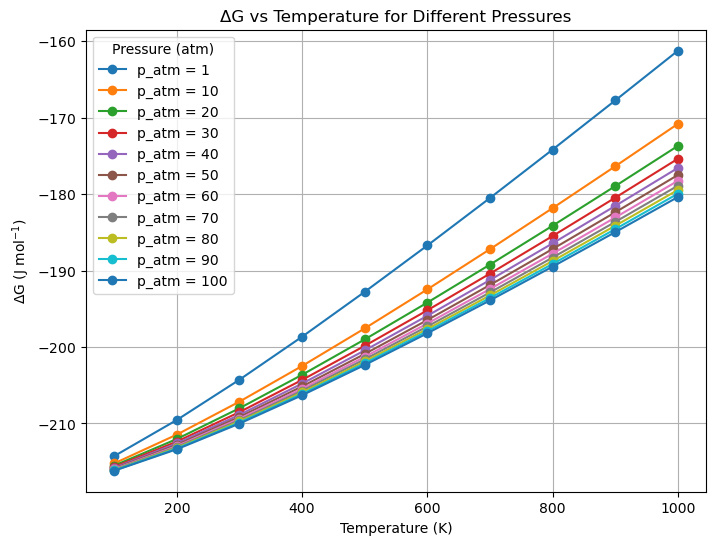

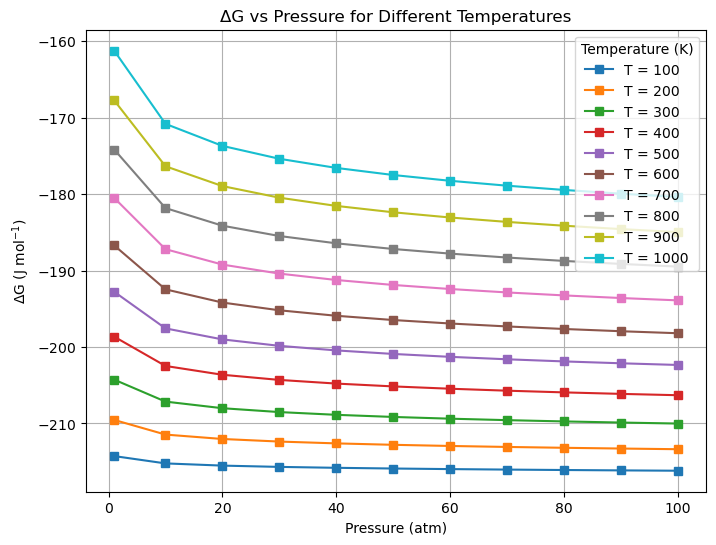

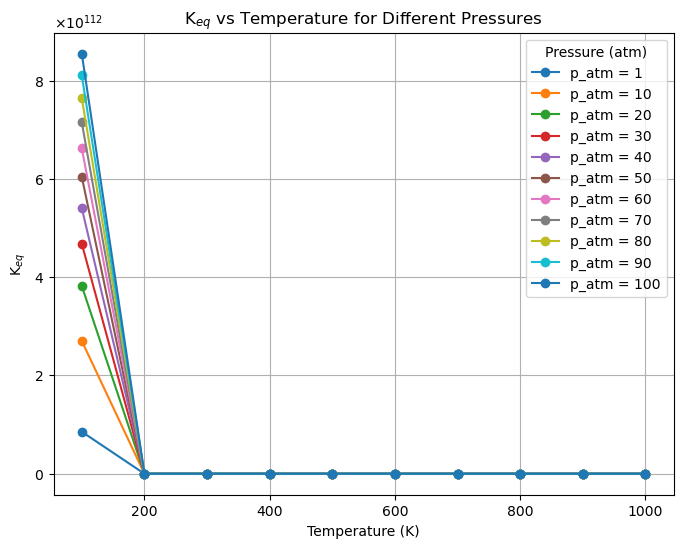

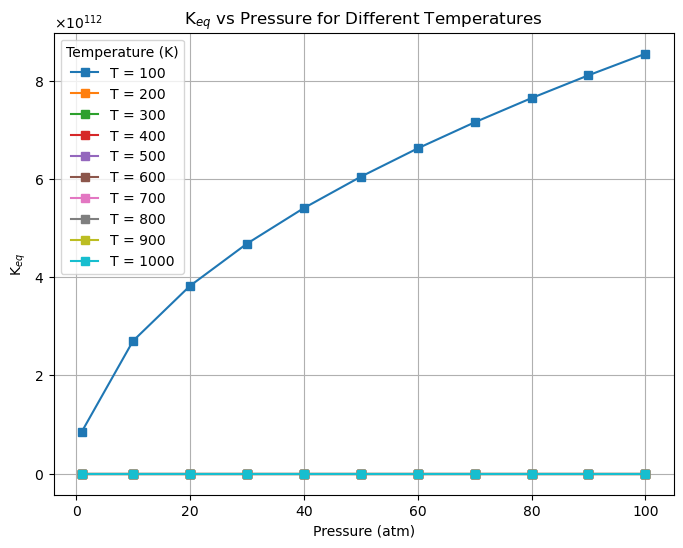

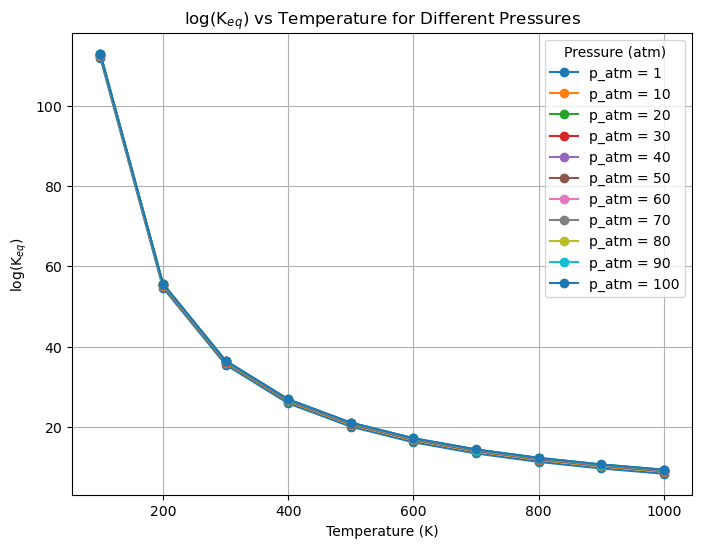

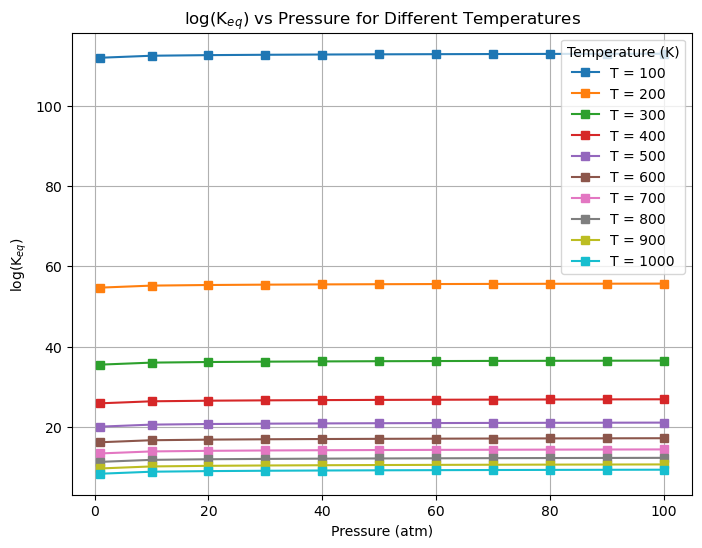

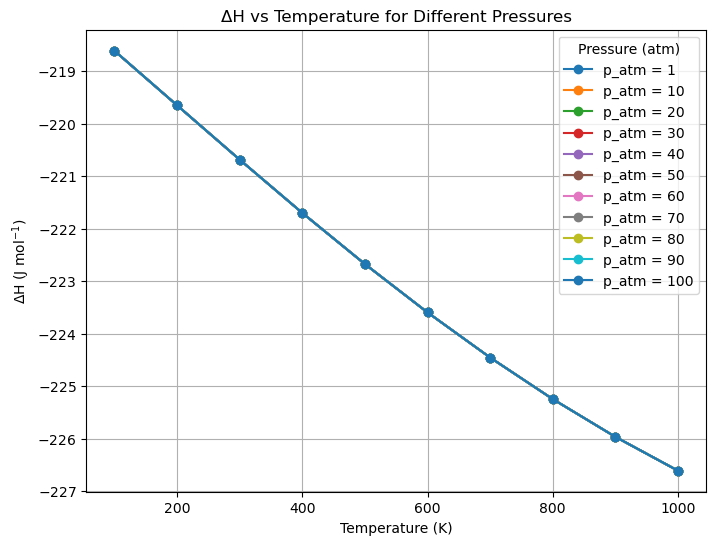

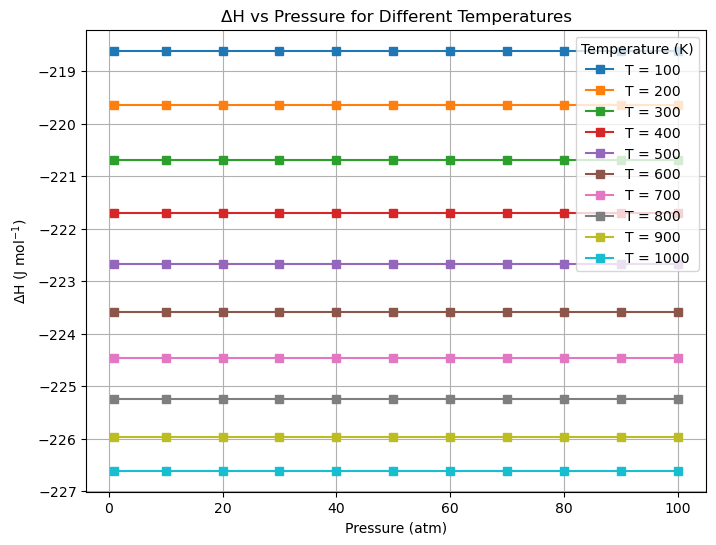

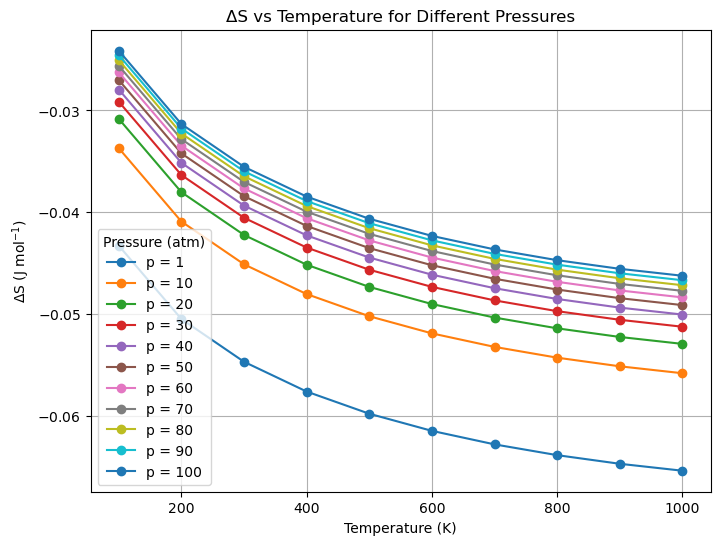

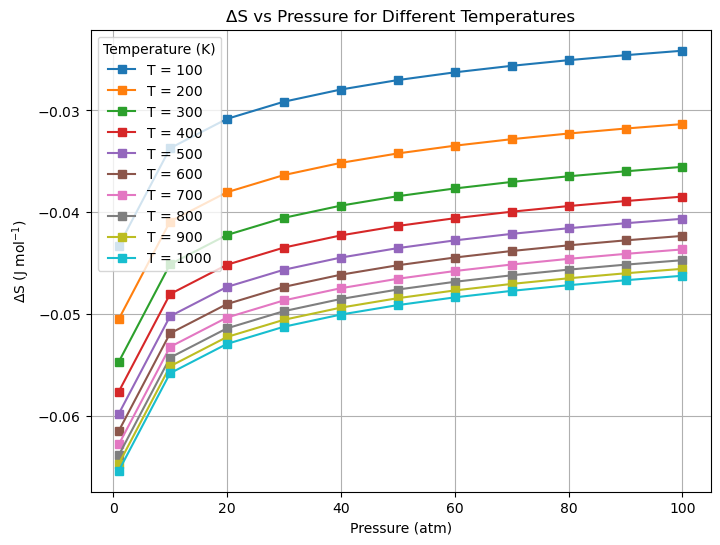

In [116]:
plt.figure(figsize=(8, 6))
for pressure in df_merged['p_atm'].unique():
    subset = df_merged[df_merged['p_atm'] == pressure]
    plt.plot(subset['T'], subset['Delta_G'], marker='o', linestyle='-', label=f'p_atm = {pressure}')

plt.xlabel('Temperature (K)')
plt.ylabel('ΔG (J mol$^{-1}$)')
plt.title('ΔG vs Temperature for Different Pressures')
plt.legend(title="Pressure (atm)")
plt.grid(True)


formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))  
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


plt.figure(figsize=(8, 6))
for temp in df_merged['T'].unique():
    subset = df_merged[df_merged['T'] == temp]
    plt.plot(subset['p_atm'], subset['Delta_G'], marker='s', linestyle='-', label=f'T = {temp}')

plt.xlabel('Pressure (atm)')
plt.ylabel('ΔG (J mol$^{-1}$)')
plt.title('ΔG vs Pressure for Different Temperatures')
plt.legend(title="Temperature (K)")
plt.grid(True)

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))  
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

plt.figure(figsize=(8, 6))
for pressure in df_merged['p_atm'].unique():
    subset = df_merged[df_merged['p_atm'] == pressure]
    plt.plot(subset['T'], subset['K_eq'], marker='o', linestyle='-', label=f'p_atm = {pressure}')

plt.xlabel('Temperature (K)')
plt.ylabel('K$_{eq}$')
plt.title('K$_{eq}$ vs Temperature for Different Pressures')
plt.legend(title="Pressure (atm)")
plt.grid(True)


formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))  
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

plt.figure(figsize=(8, 6))
for temp in df_merged['T'].unique():
    subset = df_merged[df_merged['T'] == temp]
    plt.plot(subset['p_atm'], subset['K_eq'], marker='s', linestyle='-', label=f'T = {temp}')

plt.xlabel('Pressure (atm)')
plt.ylabel('K$_{eq}$')
plt.title('K$_{eq}$ vs Pressure for Different Temperatures')
plt.legend(title="Temperature (K)")
plt.grid(True)

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))  
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

plt.figure(figsize=(8, 6))
for pressure in df_merged['p_atm'].unique():
    subset = df_merged[df_merged['p_atm'] == pressure]
    plt.plot(subset['T'], subset['lnK_eq'], marker='o', linestyle='-', label=f'p_atm = {pressure}')

plt.xlabel('Temperature (K)')
plt.ylabel('log(K$_{eq})$')
plt.title('log(K$_{eq})$ vs Temperature for Different Pressures')
plt.legend(title="Pressure (atm)")
plt.grid(True)


formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))  
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

plt.figure(figsize=(8, 6))
for temp in df_merged['T'].unique():
    subset = df_merged[df_merged['T'] == temp]
    plt.plot(subset['p_atm'], subset['lnK_eq'], marker='s', linestyle='-', label=f'T = {temp}')

plt.xlabel('Pressure (atm)')
plt.ylabel('log(K$_{eq}$)')
plt.title('log(K$_{eq}$) vs Pressure for Different Temperatures')
plt.legend(title="Temperature (K)")
plt.grid(True)

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))  
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


plt.figure(figsize=(8, 6))
for pressure in df_merged['p_atm'].unique():
    subset = df_merged[df_merged['p_atm'] == pressure]
    plt.plot(subset['T'], subset['Delta_H'], marker='o', linestyle='-', label=f'p_atm = {pressure}')

plt.xlabel('Temperature (K)')
plt.ylabel('ΔH (J mol$^{-1}$)')
plt.title('ΔH vs Temperature for Different Pressures')
plt.legend(title="Pressure (atm)")
plt.grid(True)


formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))  
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


plt.figure(figsize=(8, 6))
for temp in df_merged['T'].unique():
    subset = df_merged[df_merged['T'] == temp]
    plt.plot(subset['p_atm'], subset['Delta_H'], marker='s', linestyle='-', label=f'T = {temp}')

plt.xlabel('Pressure (atm)')
plt.ylabel('ΔH (J mol$^{-1}$)')
plt.title('ΔH vs Pressure for Different Temperatures')
plt.legend(title="Temperature (K)")
plt.grid(True)

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))  
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

plt.figure(figsize=(8, 6))
for pressure in df_merged['p_atm'].unique():
    subset = df_merged[df_merged['p_atm'] == pressure]
    plt.plot(subset['T'], subset['Delta_S'], marker='o', linestyle='-', label=f'p = {pressure}')

plt.xlabel('Temperature (K)')
plt.ylabel('ΔS (J mol$^{-1}$)')
plt.title('ΔS vs Temperature for Different Pressures')
plt.legend(title="Pressure (atm)")
plt.grid(True)


formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))  
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


plt.figure(figsize=(8, 6))
for temp in df_merged['T'].unique():
    subset = df_merged[df_merged['T'] == temp]
    plt.plot(subset['p_atm'], subset['Delta_S'], marker='s', linestyle='-', label=f'T = {temp}')

plt.xlabel('Pressure (atm)')
plt.ylabel('ΔS (J mol$^{-1}$)')
plt.title('ΔS vs Pressure for Different Temperatures')
plt.legend(title="Temperature (K)")
plt.grid(True)

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))  
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()
